## STA 141B FINAL PROJECT

In [95]:
import glob
import os
import pandas as pd
from sqlalchemy import create_engine
import sqlalchemy as sqla
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from plotnine import *
import plotnine as p9

### Introduction

The experiment goal is the find the relationship between **Human Infulence and World Climate Change**. 

Nowadays, world climate change has been one of the most important issues that many people are concerned about. For instance, we now use paper straw. Some say that **plastic has a close relationship with global warming** because its usage leads to carbon emission. Also, there is much research on-going about the negative effects of using plastic straws. Therefore many cafes and restaurants most well known Starbucks are suggesting to use paper straws instead of plastic.

Thus, we were curious whether these kinds of movements affect the environment? 

Before the data analysis, we will start from the skeptical point of view where using recyclable products would not impact much on the environment. As far as we know there are many moves to protect the environment but the global temperature is still rising every year and nothing has changed. 

Through our project, we will look for **significant global temperature changes over time**. In addition, we will show research on environmental issues that occurred at specific time got from the data analysis. 

### Data exploration

The data contains the average daily temperature of the U.S. cities and the global nations starting from the year 1950s to the 2020s created by the University of Dayton. Source data for this site are from the National Climatic Data Center. The data is available for research and non-commercial purposes only.

[Average Daily Temperature Archive](https://academic.udayton.edu/kissock/http/Weather/default.htm)

First we will start with the U.S. cities. The format of the data is simple a text file with the structure of the time series but the real problem is how to join all the files into one dataframe? To solve this question we will use glob method to read all the filenames then concatenate into one dataframe using for loop. 

In [96]:
path = "/Users/wook/Documents/Github/UC-DAVIS/STA141B"

path_us = path + "/us"

filenames = glob.glob(os.path.join(os.getcwd(),path_us, "*.txt"))
dataframes = []

df = pd.concat([pd.read_csv(fp,sep ='\s+',header=None).assign(City = os.path.basename(fp).split('.')[0])
   for fp in filenames
])
df=df.rename(columns={0:'Month',1:'Day',2:'Year',3:'Temp'})
df

,Month,Day,Year,Temp,City
0,1,1,1995,33.6,TXWICHFA
1,1,2,1995,32.1,TXWICHFA
2,1,3,1995,34.0,TXWICHFA
3,1,4,1995,27.2,TXWICHFA
4,1,5,1995,29.2,TXWICHFA
...,...,...,...,...,...
9260,5,9,2020,52.4,TNCHATTA
9261,5,10,2020,55.0,TNCHATTA
9262,5,11,2020,58.8,TNCHATTA
9263,5,12,2020,55.8,TNCHATTA


Occasionally, problems with weather station metering equipment result in missing average daily temperatures.  

In this dataset missing data is denoted as “–99”. 

In oder to increase accuracy we will drop the missing temperatures. 

In [97]:
indexNames = df[ df['Temp'] == -99 ].index
df_clean=df.copy()
df_clean.drop(indexNames , inplace=True)

df_clean.reset_index(inplace=True)
df_clean.drop(columns="index", inplace=True)
df_clean = df_clean[["City","Day","Month","Year","Temp"]]

In [98]:
df_clean

,City,Day,Month,Year,Temp
0,TXWICHFA,7,2,1995,44.7
1,TXWICHFA,28,2,1995,42.9
2,TXWICHFA,1,3,1995,30.7
3,TXWICHFA,2,3,1995,24.4
4,TXWICHFA,3,3,1995,27.8
...,...,...,...,...,...
1210453,TNCHATTA,9,5,2020,52.4
1210454,TNCHATTA,10,5,2020,55.0
1210455,TNCHATTA,11,5,2020,58.8
1210456,TNCHATTA,12,5,2020,55.8


**Appendix**

Alabama

Birmingham ( ALBIRMIN.txt )
Huntsville ( ALHUNTSV.txt )
Mobile ( ALMOBILE.txt )
Montgomery ( ALMONTGO.txt )

Alaska

Anchorage ( AKANCHOR.txt )
Fairbanks ( AKFAIRBA.txt )
Juneau ( AKJUNEAU.txt )

Arizona

Flagstaff ( AZFLAGST.txt )
Phoenix ( AZPHOENI.txt )
Tucson ( AZTUCSON.txt )
Yuma ( AZYUMA.txt )

Arkansas

Fort Smith ( ARFTSMIT.txt )
Little Rock ( ARLIROCK.txt )

California

Fresno ( CAFRESNO.txt )
Los Angeles ( CALOSANG.txt )
Sacramento ( CASACRAM.txt )
San Diego ( CASANDIE.txt )
San Francisco ( CASANFRA.txt )

Colorado

Colorado Springs ( COCOSPGS.txt )
Denver ( CODENVER.txt ) 
Grand Junction ( COGRNDJU.txt )
Pueblo ( COPUEBLO.txt )

Connecticut

Bridgeport ( CTBRIDGE.txt )
Hartford Springfield ( CTHARTFO.txt )

Delaware

Wilmington ( DEWILMIN.txt )

District of Columbia

Washington (National)  (MDWASHDC.txt)

Florida

Daytona Beach ( FLDAYTNA.txt )
Jacksonville ( FLJACKSV.txt )
Miami Beach ( FLMIAMIB.txt )
Orlando ( FLORLAND.txt )
Tallahassee ( FLTALLAH.txt )
Tampa St. Petersburg ( FLTAMPA.txt )
West Palm Beach ( FLWPALMB.txt )

Georgia

Atlanta ( GAATLANT.txt )
Columbus ( GACOLMBS.txt )
Macon ( GAMACON.txt )
Savannah ( GASAVANN.txt )

Hawaii

Honolulu ( HIHONOLU.txt )

Idaho

Boise ( IDBOISE.txt )
Pocatello ( IDPOCATE.txt )

Illinois

Chicago ( ILCHICAG.txt )
Peoria ( ILPEORIA.txt )
Rockford ( ILROCKFO.txt )
Springfield ( ILSPRING.txt )

Indiana

Evansville ( INEVANSV.txt )
Fort Wayne ( INFTWAYN.txt )
Indianapolis ( ININDIAN.txt )
South Bend ( INSOBEND.txt )

Iowa

Des Moines ( IADESMOI.txt )
Sioux City ( IASIOCTY.txt )

Kansas

Goodland ( KSGOODLA.txt )
Topeka ( KSTOPEKA.txt )
Wichita ( KSWICHIT.txt )

Kentucky

Lexington ( KYLEXING.txt )
Louisville ( KYLOUISV.txt )
Paducah ( KYPADUCA.txt )

Louisiana

Baton Rouge ( LABATONR.txt )
Lake Charles ( LALAKECH.txt )
New Orleans ( LANEWORL.txt )
Shreveport ( LASHREVE.txt )

Maine

Caribou ( MECARIBO.txt )
Portland ( MEPORTLA.txt )

Maryland

Baltimore ( MDBALTIM.txt )
Washington DC ( MDWASHDC.txt )

Massachusetts

Boston ( MABOSTON.txt )

Michigan

Detroit ( MIDETROI.txt )
Flint ( MIFLINT.txt )
Grand Rapids ( MIGRNDRA.txt )
Lansing ( MILANSIN.txt )
Sault Ste Marie ( MISTEMAR.txt )

Minnesota

Duluth ( MNDULUTH.txt )
Minneapolis St. Paul ( MNMINPLS.txt )

Mississippi

Jackson ( MSJACKSO.txt )
Tupelo ( MSTUPELO.txt )

Missouri

Kansas City ( MOKANCTY.txt )
Springfield ( MOSPRING.txt )
St Louis ( MOSTLOUI.txt )

Montana

Billings ( MTBILLIN.txt )
Great Falls ( MTGRFALL.txt )
Helena ( MTHELENA.txt )

Nebraska

Lincoln ( NELINCOL.txt )
North Platte ( NENPLATT.txt )
Omaha ( NEOMAHA.txt )

Nevada

Reno ( NVRENO.txt )
Las Vegas ( NVLASVEG.txt )

New Hampshire

Concord ( NHCONCOR.txt )

New Jersey

Atlantic City ( NJATLCTY.txt )
Newark ( NJNEWARK.txt )

New Mexico

Albuquerque ( NMALBUQU.txt )

New York

Albany ( NYALBANY.txt )
Buffalo ( NYBUFFAL.txt )
New York City ( NYNEWYOR.txt )
Rochester ( NYROCHES.txt )
Syracuse ( NYSYRACU.txt )

North Carolina

Asheville ( NCASHEVI.txt )
Charlotte ( NCCHARLO.txt )
Greensboro ( NCGRNSBO.txt )
Raleigh Durham ( NCRALEIG.txt )

North Dakota

Bismarck ( NDBISMAR.txt )
Fargo ( NDFARGO.txt )

Ohio

Akron Canton ( OHAKRON.txt )
Cincinnati ( OHCINCIN.txt )
Cleveland ( OHCLEVEL.txt )
Columbus ( OHCOLMBS.txt )
Dayton ( OHDAYTON.txt )
Toledo ( OHTOLEDO.txt )
Youngstown ( OHYOUNGS.txt )

Oklahoma

Oklahoma City ( OKOKLCTY.txt )
Tulsa ( OKTULSA.txt )

Oregon

Eugene ( OREUGENE.txt )
Medford ( ORMEDFOR.txt )
Portland ( ORPORTLA.txt )
Salem ( ORSALEM.txt )

Pennsylvania

Allentown ( PAALLENT.txt )
Erie ( PAERIE.txt )
Harrisburg ( PAHARRIS.txt )
Philadelphia ( PAPHILAD.txt )
Pittsburgh ( PAPITTSB.txt )
Wilkes Barre ( PAWILKES.txt )

Rhode Island

Rhode Island ( RIPROVID.txt )

South Carolina

Charleston ( SCCHARLE.txt )
Columbia ( SCCOLMBA.txt )

South Dakota

Rapid City ( SDRAPCTY.txt )
Sioux Falls ( SDSIOFAL.txt )

Tennessee

Chattanooga ( TNCHATTA.txt )
Knoxville ( TNKNOXVI.txt )
Memphis ( TNMEMPHI.txt )
Nashville ( TNNASHVI.txt )

Texas

Abilene ( TXABILEN.txt )
Amarillo ( TXAMARIL.txt )
Austin ( TXAUSTIN.txt )
Brownsville ( TXBROWNS.txt )
Corpus Christi ( TXCORPUS.txt )
Dallas Ft Worth ( TXDALLAS.txt )
El Paso ( TXELPASO.txt )
Houston ( TXHOUSTO.txt )
Lubbock ( TXLUBBOC.txt )
Midland Odessa ( TXMIDLAN.txt )
San Angelo ( TXSANANG.txt )
San Antonio ( TXSANANT.txt )
Waco ( TXWACO.txt )
Wichita Falls ( TXWICHFA.txt )

Utah

Salt Lake City ( UTSALTLK.txt )

Vermont

Burlington ( VTBURLIN.txt )

Virginia

Norfolk ( VANORFOL.txt )
Richmond ( VARICHMO.txt )
Roanoke ( VAROANOK.txt )

Washington

Seattle ( WASEATTL.txt )
Spokane ( WASPOKAN.txt )
Yakima ( WAYAKIMA.txt )

West Virginia

Charleston ( WVCHARLE.txt )
Elkins ( WVELKINS.txt )

Wisconsin

Green Bay ( WIGREBAY.txt )
Madison ( WIMADISO.txt )
Milwaukee ( WIMILWAU.txt )

Wyoming

Casper ( WYCASPER.txt )
Cheyenne ( WYCHEYEN.txt )

Additional Territories

San Juan Puerto Rico( PRSANJUA.txt )

### Exporting data into SQL

In [99]:
sqlite_file = 'ustemp.sqlite'
table_name = 'state'

df_conn = sqla.create_engine('sqlite:///' + sqlite_file)
connection = df_conn.raw_connection()
cursor = connection.cursor()
command = "DROP TABLE IF EXISTS {};".format(table_name)
cursor.execute(command)
connection.commit()
cursor.close()


df_clean.to_sql('state', df_conn, if_exists='replace')

pd.read_sql_query("select count(*) from "+ table_name,df_conn)

,count(*)
0,1210458


### Visualization

In [100]:
first_sql='''
select City, Year, avg(Temp) as Avg_t from state group by City, Year order by City
'''

first_data= pd.read_sql_query(first_sql,df_conn)
first_data["City"].value_counts()

ARLIROCK    26
VAROANOK    26
MDWASHDC    26
NCASHEVI    26
OHTOLEDO    26
            ..
PAHARRIS    16
LABATONR    16
DEWILMIN    16
AZYUMA      12
AZFLAGST    10
Name: City, Length: 157, dtype: int64

In [101]:
# Major Cities :
# California : Los Angeles(CALOSANG), San Diego(CASANDIE), San Francisco(CASANFRA)
# New York : New York City(NYNEWYOR), Rochester(NYROCHES), Syracuse(NYSYRACU)
# Texas : Abilene(TXABILEN), Amarillo(TXAMARIL), San Antonio(TXSANANT)


#1.어떤 나라가 가장 온도가 많이 올랐는지 
#2.어떤 달에 가장 많이 올랐는지

In [102]:
city_lst = ["CALOSANG", "CASANDIE", "CASANFRA", 
            "NYNEWYOR", "NYROCHES", "NYSYRACU", 
            "TXABILEN", "TXAMARIL", "TXSANANT"]

Major_cities = first_data[first_data["City"].isin(city_lst)][["City", "Year", "Avg_t"]]

In [103]:
Major_cities.head(60)

,City,Year,Avg_t
334,CALOSANG,1995,62.947959
335,CALOSANG,1996,60.343709
336,CALOSANG,1997,64.270288
337,CALOSANG,1998,60.611650
338,CALOSANG,1999,61.969156
339,CALOSANG,2000,62.681081
340,CALOSANG,2001,61.015974
341,CALOSANG,2002,61.143769
342,CALOSANG,2003,62.389124
343,CALOSANG,2004,61.938095


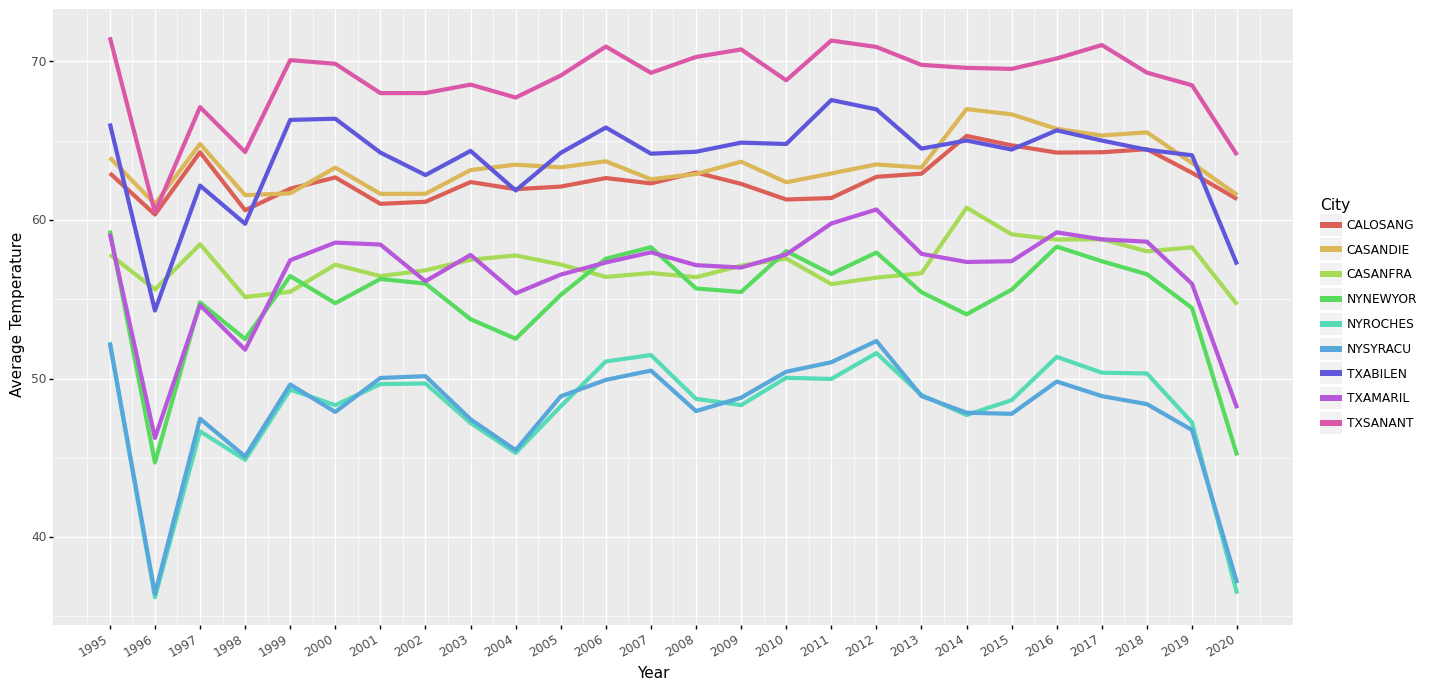

<ggplot: (8767639516377)>

In [104]:
gg = p9.ggplot(Major_cities)
gg += p9.aes(x="Year",
            y="Avg_t",
            color="City")
gg += p9.geom_line(alpha=1, size=1.7)
gg += scale_x_continuous(breaks=range(1995,2021,1))
gg += theme(figure_size=(16,8),
          axis_text_x=(element_text(angle=30, hjust=1)))
gg += xlab("Year")
gg += ylab("Average Temperature")

gg

As you can see from the plot, except for 1996 and 2020 there were no drastic change over time. Moreover, it is hard to tell the average temperature is 

In [105]:
#second_data

second_sql='''
select City, Year, Month, avg(Temp) as Avg_t from state group by City, Year, Month order by Year
'''

second_data= pd.read_sql_query(second_sql,df_conn)
second_data

,City,Year,Month,Avg_t
0,AKANCHOR,1995,2,28.200000
1,AKANCHOR,1995,3,19.578571
2,AKANCHOR,1995,4,39.772414
3,AKANCHOR,1995,5,48.625806
4,AKANCHOR,1995,6,55.773333
...,...,...,...,...
45889,WYCHEYEN,2020,1,30.762069
45890,WYCHEYEN,2020,2,27.258621
45891,WYCHEYEN,2020,3,37.125806
45892,WYCHEYEN,2020,4,40.517241


In [106]:
second_data["Avg_t"].describe()

count    45894.000000
mean        56.253887
std         17.627294
min        -25.480000
25%         43.167852
50%         57.817262
75%         70.871667
max         98.692000
Name: Avg_t, dtype: float64

In [122]:
#Data contains from 1995/2 to 2020/5 

Major_city_per_month = second_data[second_data["City"].isin(city_lst)]

City_1996 = Major_city_per_month[Major_city_per_month["Year"]==1996]
City_1999 = Major_city_per_month[Major_city_per_month["Year"]==1999]
City_2002 = Major_city_per_month[Major_city_per_month["Year"]==2002]
City_2005 = Major_city_per_month[Major_city_per_month["Year"]==2005]
City_2008 = Major_city_per_month[Major_city_per_month["Year"]==2008]
City_2011 = Major_city_per_month[Major_city_per_month["Year"]==2011]
City_2014 = Major_city_per_month[Major_city_per_month["Year"]==2014]
City_2017 = Major_city_per_month[Major_city_per_month["Year"]==2017]
City_2019 = Major_city_per_month[Major_city_per_month["Year"]==2019]


In [123]:
gg96 = p9.ggplot(City_1996)
gg96 += p9.aes(x="Month",
            y="Avg_t",
            color="City")
gg96 += p9.geom_line(alpha=1, size=1.7)
gg96 += scale_x_continuous(breaks=range(1,13,1))
gg96 += scale_y_continuous(breaks=range(-30,100,3))
gg96 += theme(figure_size=(16,8),
          axis_text_x=(element_text(angle=0, hjust=1)))
gg96 += xlab("Month")
gg96 += ylab("Average Temperature")
gg96 += labs(title="Average temperature change by Month, 1996")


gg08 = p9.ggplot(City_2008)
gg08 += p9.aes(x="Month",
            y="Avg_t",
            color="City")
gg08 += p9.geom_line(alpha=1, size=1.7)
gg08 += scale_x_continuous(breaks=range(1,13,1))
gg08 += scale_y_continuous(breaks=range(-30,100,3))
gg08 += theme(figure_size=(16,8),
          axis_text_x=(element_text(angle=0, hjust=1)))
gg08 += xlab("Month")
gg08 += ylab("Average Temperature")
gg08 += labs(title="Average temperature change by Month, 2008")


gg19 = p9.ggplot(City_2019)
gg19 += p9.aes(x="Month",
            y="Avg_t",
            color="City")
gg19 += p9.geom_line(alpha=1, size=1.7)
gg19 += scale_x_continuous(breaks=range(1,13,1))
gg19 += scale_y_continuous(breaks=range(-30,100,3))
gg19 += theme(figure_size=(16,8),
          axis_text_x=(element_text(angle=0, hjust=1)))
gg19 += xlab("Month")
gg19 += ylab("Average Temperature")
gg19 += labs(title="Average temperature change by Month, 2019")


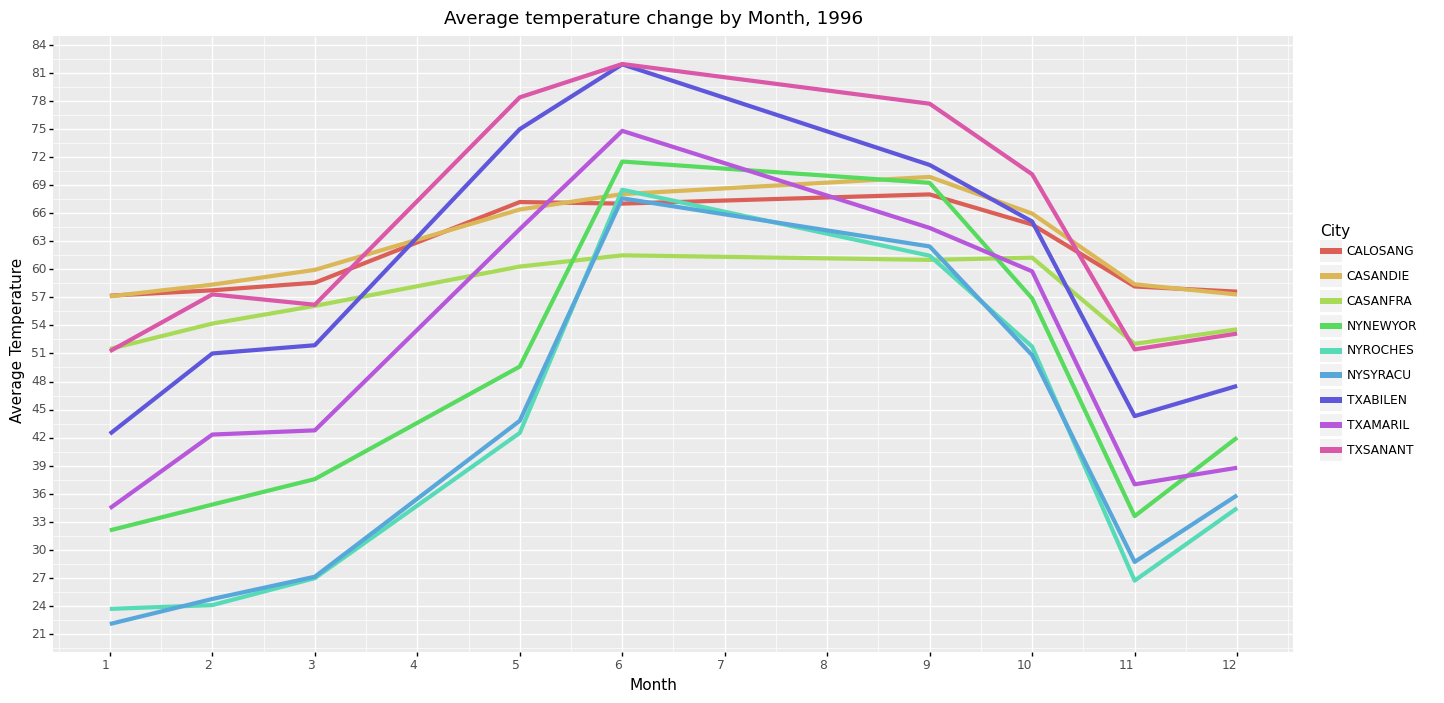

<ggplot: (8767735017253)>

In [124]:
gg96

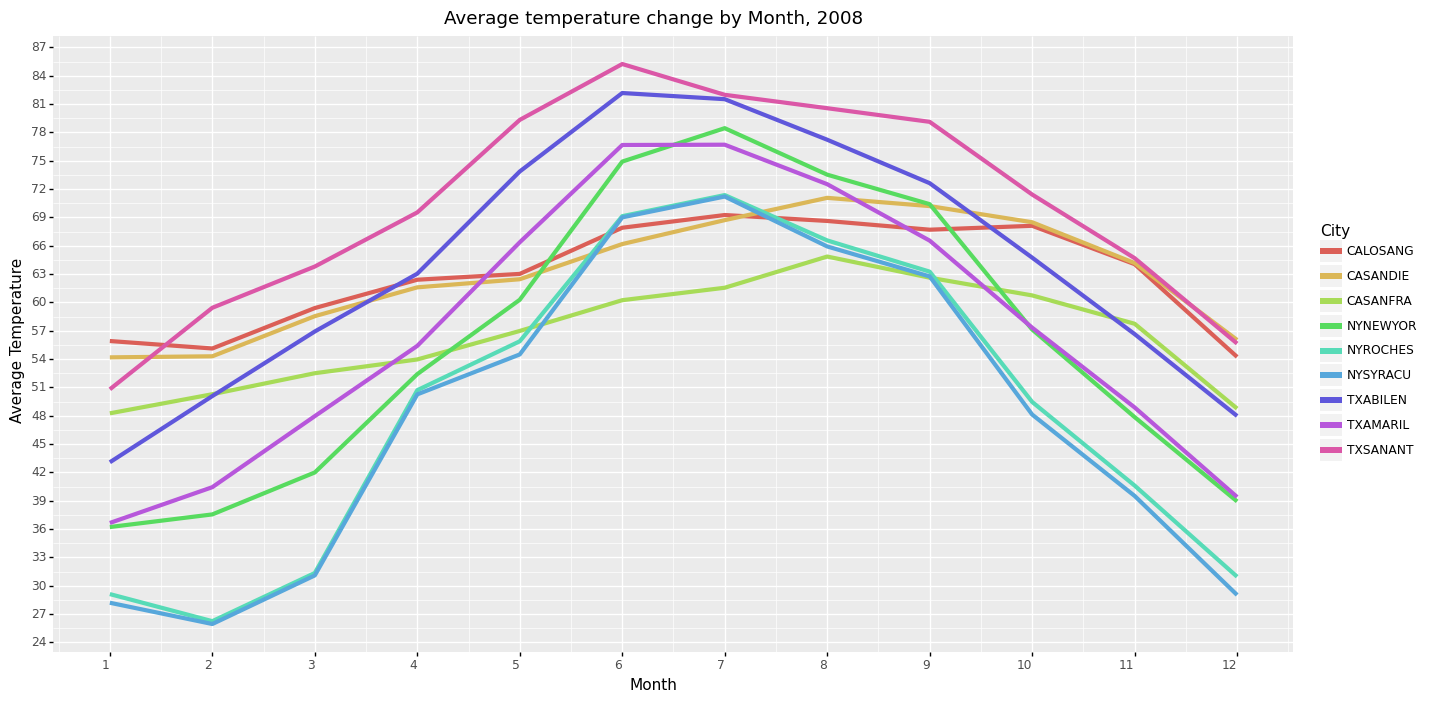

<ggplot: (8767735017247)>

In [125]:
gg08

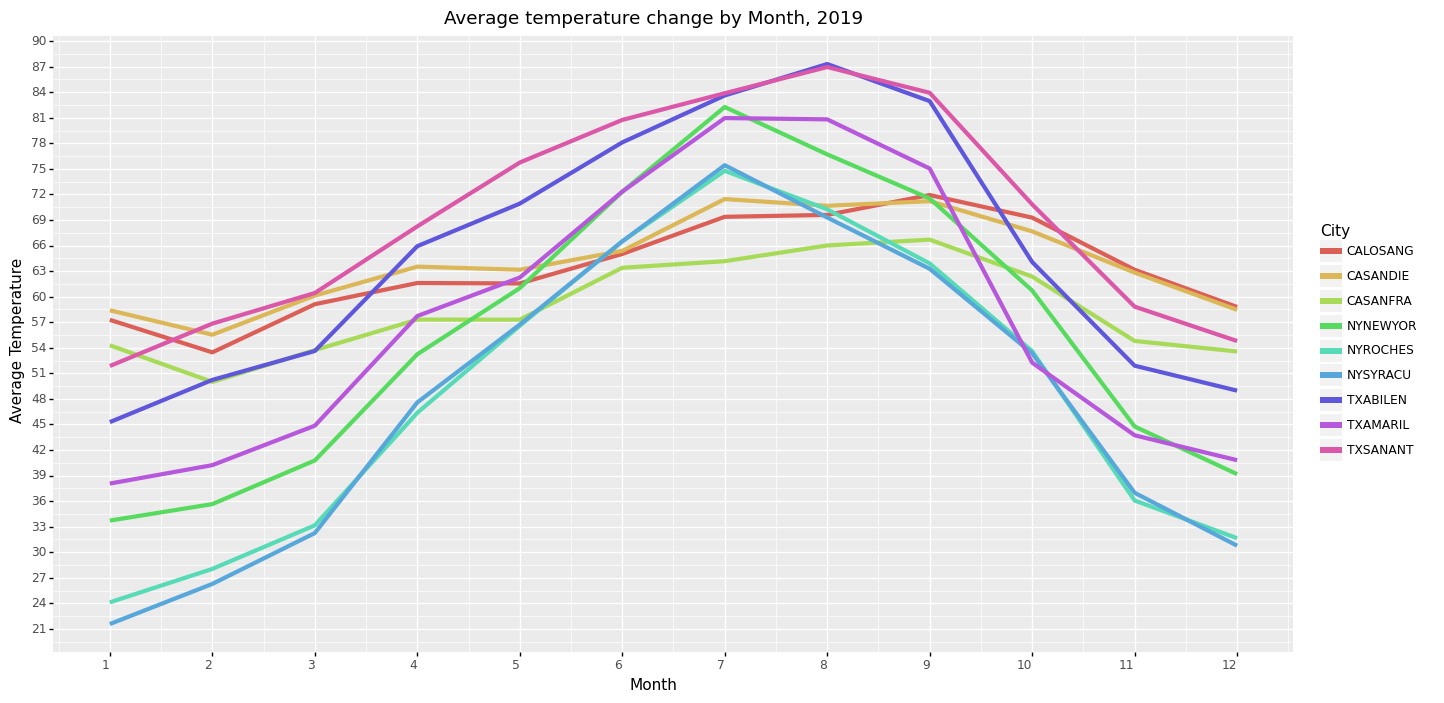

<ggplot: (8767735004703)>

In [126]:
gg19

According to plots from 1996, 2008, and 2019 the maximum temperature is rising. The difference is that the highest peak month is moving to the right. In 1996 the highest temperatrue of the year is around May and June while in 2008 it is June to July and in 2019 it is july to August. 

### Data Exploration (ASIA)

In [112]:
path_asia = path + "/asia"

filenames_asia = glob.glob(os.path.join(os.getcwd(), path_asia, "*.txt"))
dataframes_asia = []

df_asia = pd.concat([pd.read_csv(fp,sep ='\s+',header=None).assign(City = os.path.basename(fp).split('.')[0])
   for fp in filenames_asia
])
df_asia=df_asia.rename(columns={0:'Month',1:'Day',2:'Year',3:'Temp'})
df_asia = df_asia[["City","Day","Month","Year","Temp"]]

indexNames = df_asia[ df_asia['Temp'] == -99 ].index
df_asia_clean=df_asia.copy()
df_asia_clean.drop(indexNames , inplace=True)

df_asia_clean.reset_index(inplace=True)
df_asia_clean.drop(columns="index", inplace=True)
df_asia_clean = df_asia_clean[["City","Day","Month","Year","Temp"]]

df_asia_clean

,City,Day,Month,Year,Temp
0,JPSAPPOR,16,9,1996,63.2
1,JPSAPPOR,17,9,1996,64.8
2,JPSAPPOR,18,9,1996,64.3
3,JPSAPPOR,19,9,1996,66.5
4,JPSAPPOR,20,9,1996,64.4
...,...,...,...,...,...
138319,MSKUALA,9,5,2020,85.4
138320,MSKUALA,10,5,2020,84.9
138321,MSKUALA,11,5,2020,87.2
138322,MSKUALA,12,5,2020,85.4


In [113]:
df_asia_clean.City

0         JPSAPPOR
1         JPSAPPOR
2         JPSAPPOR
3         JPSAPPOR
4         JPSAPPOR
            ...   
138319     MSKUALA
138320     MSKUALA
138321     MSKUALA
138322     MSKUALA
138323     MSKUALA
Name: City, Length: 138324, dtype: object

In [114]:
sqlite_file_asia = 'aisatemp.sqlite'
table_name_asia = 'state_asia'

df_conn_asia = sqla.create_engine('sqlite:///' + sqlite_file_asia)
connection = df_conn_asia.raw_connection()
cursor = connection.cursor()
command = "DROP TABLE IF EXISTS {};".format(table_name_asia)
cursor.execute(command)
connection.commit()
cursor.close()

df_asia.to_sql('state_asia', df_conn_asia, if_exists='replace')


In [115]:
#seoul_data
korea_sql='''
select City, Year, Month, Temp from state_asia where City = 'KOSEOUL'
'''

korea_data= pd.read_sql_query(korea_sql,df_conn_asia)
korea_data

,City,Year,Month,Temp
0,KOSEOUL,1995,1,23.3
1,KOSEOUL,1995,1,33.2
2,KOSEOUL,1995,1,32.1
3,KOSEOUL,1995,1,26.8
4,KOSEOUL,1995,1,25.3
...,...,...,...,...
9261,KOSEOUL,2020,5,57.8
9262,KOSEOUL,2020,5,58.2
9263,KOSEOUL,2020,5,60.1
9264,KOSEOUL,2020,5,57.2


### Data Analysis

### Conclusion